In [1]:
#Author(s): Jose Torres-Vargas
import pandas as pd
from binInterface import featRead
import sys
#might have to change way path is added depending on Operatin Sys
sys.path.insert(0, '../ML_Algs')
import ANN_class

Using TensorFlow backend.


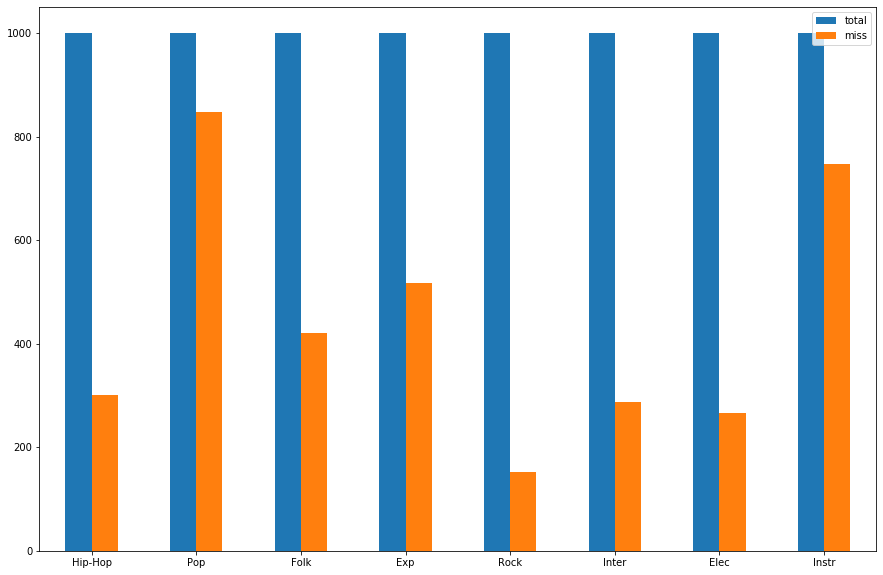

In [3]:
#number of missclassfications for each root genre in each subset(small, medium, and cleanLarge)
#were calculted to create these plots. At very bottom is a script that allows you to
#compute these numbers yourself however computation time is very long. In
#addition the predict() method of our model consumes memory. Python was not
#freeing up resources when we needed it to and as such there exists a meory leak.
#If you want to calculate these values do it for one bin(genre) a time especially
#for the large subset as some bins contain up to 14,000 tracks that need to be
#predicted. The only way we currently have of freeing up memory is by computing
#misses for one bin and then recording results and restarting the kernel to
#free up memory.

#small dataset
finalMisses = {}
#finalMisses['rootGenre'] = [misses, total samples]
finalMisses['Hip-Hop'] = [301, 1000]
finalMisses['Pop'] = [847, 1000]
finalMisses['Folk'] = [421, 1000]
finalMisses['Exp'] = [518, 1000]
finalMisses['Rock'] = [152, 1000]
finalMisses['Inter'] = [288, 1000]
finalMisses['Elec'] = [267,1000]
finalMisses['Instr'] = [747,1000]

names = []
m = []
t = []
for key in finalMisses:
    arr = finalMisses[key]
    names.append(key)
    m.append(arr[0])
    t.append(arr[1])
df = pd.DataFrame({'total': t, 'miss': m}, index=names)
ax = df.plot.bar(rot=0, figsize=(15,10))

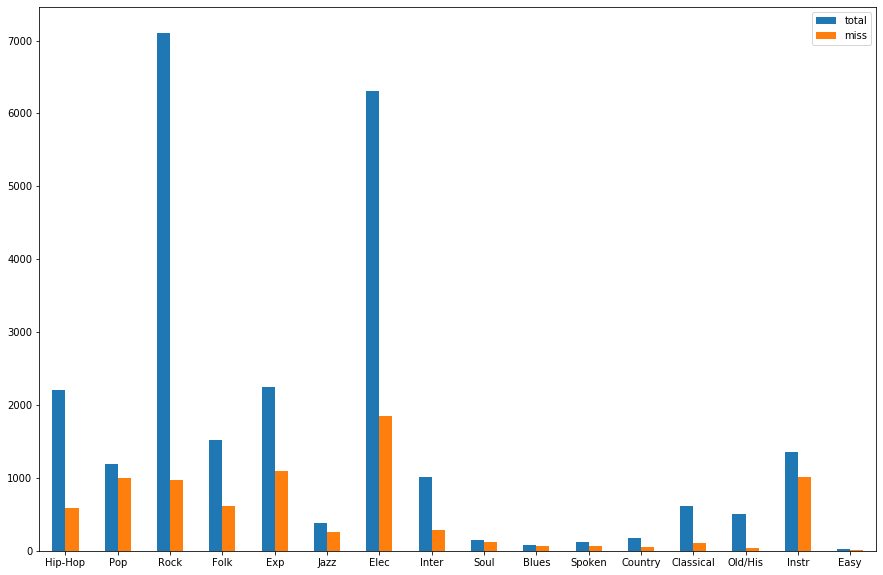

In [4]:
#medium dataset
finalMisses = {}
#finalMisses['rootGenre'] = [misses, total samples]
finalMisses['Hip-Hop'] = [587, 2201]
finalMisses['Pop'] = [1004, 1186]
finalMisses['Rock'] = [965, 7103]
finalMisses['Folk'] = [615,1519]
finalMisses['Exp'] = [1101, 2251]
finalMisses['Jazz'] = [262, 384]
finalMisses['Elec'] = [1853, 6314]
finalMisses['Inter'] = [292,1018]
finalMisses['Soul'] = [117, 154]
finalMisses['Blues'] = [64, 74]
finalMisses['Spoken'] = [69, 118]
finalMisses['Country'] = [57, 178]
finalMisses['Classical'] = [108, 619]
finalMisses['Old/His'] = [33, 510]
finalMisses['Instr'] = [1017, 1350]
finalMisses['Easy'] = [12, 21]

names = []
m = []
t = []
for key in finalMisses:
    arr = finalMisses[key]
    names.append(key)
    m.append(arr[0])
    t.append(arr[1])
df = pd.DataFrame({'total': t, 'miss': m}, index=names)
ax = df.plot.bar(rot=0, figsize=(15,10))

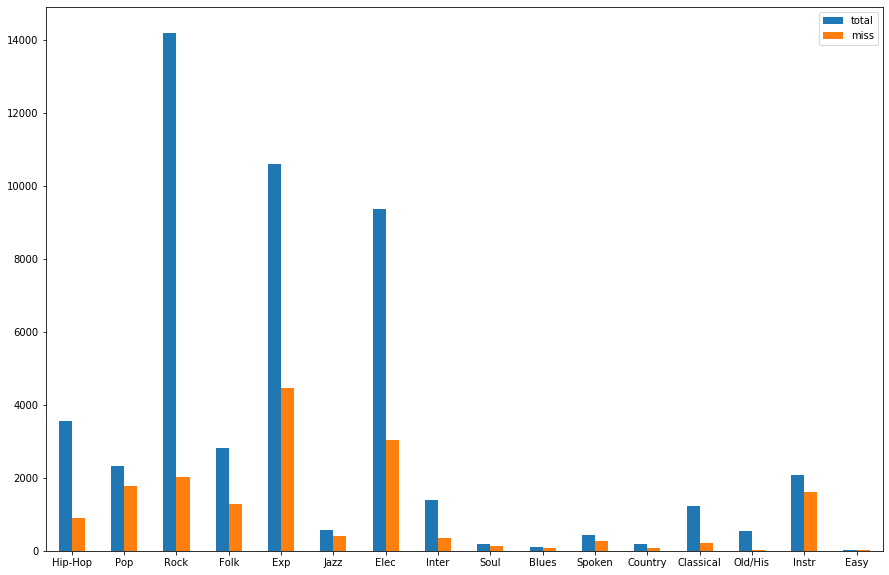

In [5]:
#clean large dataset
#finalMisses['rootGenre'] = [misses, total samples]
finalMisses = {}
finalMisses['Hip-Hop'] = [906, 3552]
finalMisses['Pop'] = [1772, 2332]
finalMisses['Rock'] = [2025, 14182]
finalMisses['Folk'] = [1285,2803]
finalMisses['Exp'] = [4451, 10608]
finalMisses['Jazz'] = [399, 571]
finalMisses['Elec'] = [3024, 9372]
finalMisses['Inter'] = [364,1389]
finalMisses['Soul'] = [136, 175]
finalMisses['Blues'] = [84, 110]
finalMisses['Spoken'] = [258, 423]
finalMisses['Country'] = [64, 194]
finalMisses['Classical'] = [210, 1230]
finalMisses['Old/His'] = [35, 554]
finalMisses['Instr'] = [1608, 2079]
finalMisses['Easy'] = [14, 24]

names = []
m = []
t = []
for key in finalMisses:
    arr = finalMisses[key]
    names.append(key)
    m.append(arr[0])
    t.append(arr[1])
df = pd.DataFrame({'total': t, 'miss': m}, index=names)
ax = df.plot.bar(rot=0, figsize=(15,10))

# Manually Compute missclassifications

In [6]:
neuralNet = ANN_class.ANN(trained_model='matt')
reader = featRead(['features.pkl', 'tracks.pkl'])

Loading a model from disk!
Parameters loaded from disk:
num_input: 189
num_hidden_layers: 1
nodes_per_hidden: 190
num_output: 16
hidden_activation: relu
output_activation: softmax
initialize: False
learning_rate: 10
loss_function: categorical_crossentropy

built using:
{'num_input': 189, 'num_hidden_layers': 1, 'nodes_per_hidden': 190, 'num_output': 16, 'hidden_activation': 'relu', 'output_activation': 'softmax', 'initialize': False, 'learning_rate': 10, 'loss_function': 'categorical_crossentropy', 'features': [0]}


Loading trained weights!

Loading feature set!
ANN() constructor finished
********

Reading features.pkl
Reading tracks.pkl


In [7]:
#get bins for small, medium, and cleanLarge
#returns a dictionary where each entry is a bin
bins = reader.getBins('small')

In [8]:
gs = []
for key in bins:
    gs.append(key)
#list all keys or bins(genres) in our dictionary
gs
totalMisses = {}

In [9]:
miss = 0
#can be automated with for loop that goes through list of keys gs, but memory
#consumption is too high done manually, reseting kernel when needed.
genre = bins[gs[0]]
for sample in genre:
    song = neuralNet.predict(sample)
    if(song['prediction']['result'] != gs[0]):
        miss = miss + 1

totalMisses[gs[0]] = [miss, len(bins[gs[0]])]

In [10]:
totalMisses

{'Hip-Hop': [301, 1000]}